In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# path = "C:/Users/taaha/Downloads/ct_nonequi_tilt/164515-00000014.dcm"

path = "C:/Users/taaha/Downloads/manifest-OtXaMwL56190865641215613043/QIN LUNG CT/QIN-LSC-0055/07-27-2003-1-CT Thorax wo Contrast-86597/5.000000-THORAX WO  3.0  B41 Soft Tissue-77621/1-015.dcm"
path = r'C:\Users\taaha\Downloads\manifest-OtXaMwL56190865641215613043\QIN LUNG CT\R0223\12-05-2001-NA-CT CHEST WITH CONTRAST-15336\2.000000-NA-08982\1-168.dcm'

path = r"C:\Users\taaha\Downloads\1-55.dcm"
# path = r'C:\Users\taaha\Downloads\1-55 (1).dcm'

# path  = r'C:/Users/taaha/Downloads/manifest-OtXaMwL56190865641215613043/QIN LUNG CT\QIN-LSC-0003\04-01-2015-1-NA-41946\1000.000000-QIN CT challenge alg01 run02segmentation result-72120/1-1.dcm'



ds = pydicom.read_file(path)
ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4320.7015.297870584753128030347569672736
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'

In [20]:

from pydicom.uid import CTImageStorage

print(CTImageStorage)
print(ds.SOPClassUID)

1.2.840.10008.5.1.4.1.1.2
1.2.840.10008.5.1.4.1.1.2


In [11]:
help(ds.file_meta)

Help on FileMetaDataset in module pydicom.dataset object:

class FileMetaDataset(Dataset)
 |  FileMetaDataset(*args: Union[ForwardRef('Dataset'), MutableMapping[pydicom.tag.BaseTag, Union[pydicom.dataelem.DataElement, pydicom.dataelem.RawDataElement]]], **kwargs: Any) -> None
 |  
 |  Contains a collection (dictionary) of group 2 DICOM Data Elements.
 |  
 |  .. versionadded:: 2.0
 |  
 |  Derived from :class:`~pydicom.dataset.Dataset`, but only allows
 |  Group 2 (File Meta Information) data elements
 |  
 |  Method resolution order:
 |      FileMetaDataset
 |      Dataset
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args: Union[ForwardRef('Dataset'), MutableMapping[pydicom.tag.BaseTag, Union[pydicom.dataelem.DataElement, pydicom.dataelem.RawDataElement]]], **kwargs: Any) -> None
 |      Initialize a FileMetaDataset
 |      
 |      Parameters are as per :class:`Dataset`; this overrides the super class
 |      only to check that all are group 2 data 

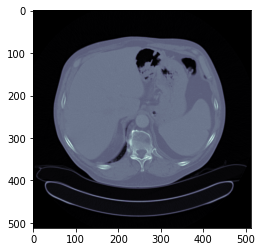

In [7]:
plt.imshow(ds.pixel_array, cmap = plt.cm.bone)

In [ ]:
print(ds.pixel_array.dtype)

uint16
uint8


In [ ]:
unique = np.unique(ds.pixel_array)
len(unique)

1936

In [ ]:
# from pydicom import dcmread
# from pydicom.data import get_testdata_file
# from pydicom.uid import RLELossless

# original_size = os.path.getsize(path)

# arr = ds.pixel_array
# ds.compress(RLELossless, arr, encoding_plugin = 'pylibjpeg')
# saved_to = f"C:/Users/taaha/Downloads/rle_ct_dataset/164515-00000014.dcm"
# ds.save_as(saved_to)

# size = os.path.getsize(saved_to)
# print(original_size, size)
# ratio = original_size / size
# print(ratio)


527382 271230
1.9444088043358037
